In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') 
import seaborn as sns

In [2]:
df_transac = pd.read_csv('transactions.small.csv')
df_companies = pd.read_csv('companies.small.csv')
df_clients = pd.read_csv('clients.small.csv')
df_atms = pd.read_csv('atms.small.csv')

In [3]:
df_transac.head()

,id,source,target,date,time,amount,currency
0,7d5d4762-24fe-4cf0-8185-40eff4d299a0,ee288787-e310-4bb8-b2a1-f0f6a1ad8f06,4abed95d-5618-42e8-a5a0-06e4d69f81ca,24/09/2015,15:57:52,1683.730271,None
1,357a8314-c6b2-4a38-b6df-3bcaa4b6ecbb,e5018dfa-d6fc-4f44-a4ae-f59cd9e3275a,e0708e37-8466-4893-bc1b-bbae9fdd9aeb,27/17/2015,23:59:57,733.476914,None
2,9adcfd16-ac51-47e7-85e8-8dab05ddbc23,cc9ec01d-9414-413e-bf97-896271fdc446,4c3809e8-6d31-4e79-8abd-f933dcd95c08,27/13/2017,15:34:34,469.263757,None
3,529d9a6a-8512-4ff9-b7e9-dcd1674fbfc7,e4ad5cec-82c0-4e5e-85a2-f2a2e7bfcf52,ac0c5a47-503a-4852-ac0b-b233239ede95,24/09/2015,15:57:52,1683.730271,None
4,56ce6a32-4059-4e35-8650-60364c0199f4,ada7124c-fea2-4956-8699-759b7b6505f3,a397e9d5-259a-4931-a073-50b007ccf1df,27/03/2015,23:23:42,3737.245020,None


In [4]:
df_companies.head()

,id,type,name,country
0,9c6e1a65-9239-44d6-80cc-c3b027a92372,Professional corporation,Body Fate,Japan
1,32ba86c3-dc64-4e6d-b79b-372a0d52c26e,Incorporated,Blyth Inc.,Central African Republic
2,e1a6ffb8-46fa-488a-ac66-2d5db12a7f0f,Limited Liability Partnership,Naturohair,American Samoa
3,a2a70edc-7895-461c-94c8-4d8d0cedff47,Limited Liability Company,Strongbod,South Sudan
4,ffc343f8-0938-43c4-aa9e-98cd052f9355,Limited Liability Partnership,Matrix Architectural Service,Malaysia


In [5]:
df_clients.head()

,id,first_name,last_name,age,email,occupation,political_views,nationality,university,academic_degree,address,postal_code,country,city
0,b07102b8-5373-4d03-8eae-d68b3cc407e0,Kermit,Reynolds,63,epical1905@yandex.com,Warden,Socialist,Estonian,University of Massachusetts Boston (UMass Boston),None,865 Brotherhood Mall,85875,Luxembourg,Bradenton
1,860c16c2-a66f-4dca-8060-89396a5c41c1,Madlyn,Nunez,43,bazooka1835@live.com,Wood Worker,Socialist,Jordanian,University of California Santa Barbara (UC Sa...,None,1310 Northridge Path,85875,Moldova,Gulfport
2,fec91c68-5577-4979-b522-6804a0efd371,Towanda,Griffin,38,algerine1969@gmail.com,Ironmonger,Liberal,Iranian,University of California Riverside (UC Rivers...,None,922 Terrace Grove,85875,Antarctica,Carpentersville
3,09f7f81c-e8c3-4fb7-98cb-70f04d1df9b4,Dyan,Mcconnell,36,abroad1911@yahoo.com,Aircraft Maintenance Engineer,Socialist,Uruguayan,Georgia Institute of Technology (Georgia Tech),None,1274 Rodgers Townline,85875,Belgium,Goodlettsville
4,010b4fa3-cf0b-4cf5-9f95-aab959ac4c8c,Cristin,Ross,51,qualm1898@live.com,Chauffeur,Libertarian,Polish,University of California San Diego (UC San Di...,None,1219 Ringold Pike,85875,St. Lucia,Albany


In [6]:
df_atms.head()

,id,latitude,longitude
0,7c22e035-e905-4be2-affa-130489b36203,21.108465,36.738927


In [7]:
df_transac.shape

(18488, 7)

In [8]:
# Count number of none in amount column
df_transac.dtypes

id           object
source       object
target       object
date         object
time         object
amount      float64
currency     object
dtype: object

In [9]:
#Consider none as euro and drop other currencies
df_transac = df_transac.loc[df_transac['currency']=='None']

In [10]:
df_transac

,id,source,target,date,time,amount,currency
0,7d5d4762-24fe-4cf0-8185-40eff4d299a0,ee288787-e310-4bb8-b2a1-f0f6a1ad8f06,4abed95d-5618-42e8-a5a0-06e4d69f81ca,24/09/2015,15:57:52,1683.730271,None
1,357a8314-c6b2-4a38-b6df-3bcaa4b6ecbb,e5018dfa-d6fc-4f44-a4ae-f59cd9e3275a,e0708e37-8466-4893-bc1b-bbae9fdd9aeb,27/17/2015,23:59:57,733.476914,None
2,9adcfd16-ac51-47e7-85e8-8dab05ddbc23,cc9ec01d-9414-413e-bf97-896271fdc446,4c3809e8-6d31-4e79-8abd-f933dcd95c08,27/13/2017,15:34:34,469.263757,None
3,529d9a6a-8512-4ff9-b7e9-dcd1674fbfc7,e4ad5cec-82c0-4e5e-85a2-f2a2e7bfcf52,ac0c5a47-503a-4852-ac0b-b233239ede95,24/09/2015,15:57:52,1683.730271,None
4,56ce6a32-4059-4e35-8650-60364c0199f4,ada7124c-fea2-4956-8699-759b7b6505f3,a397e9d5-259a-4931-a073-50b007ccf1df,27/03/2015,23:23:42,3737.245020,None
5,99eb51d9-e814-4532-9311-9221f37d0e2c,e2dbc017-597e-429e-8efc-2a4c93144220,a65fa9a2-933f-48c3-b7f8-c249216da67d,27/17/2015,23:59:57,2202.298572,None
6,cc81e13e-bc42-416c-97b6-d7ee21c01f2e,3e792e29-327a-4d95-95ef-754caaf9b75b,4bae1993-54ab-400b-ba32-2046f1ca0a6a,27/03/2015,17:53:43,622.874170,None
8,22c4e100-74e2-4100-9a29-75f69936228a,c61620c3-e6a9-4bb0-9cdc-b25f2c5938cd,ec51746e-84d6-4408-919d-935fcdb09b97,27/20/2016,23:58:31,1749.692515,None
9,62ccfe19-7493-4ab3-995f-147c5482c664,595f4b91-31ba-4f2d-8bf9-3cb0249dd426,2a850800-f56f-4ccb-b750-f8798f9a6745,25/20/2017,22:47:58,1889.037079,None
10,0241a1b0-4338-46d3-adcc-2be65c6a54da,434ef91a-f8ce-4c19-af21-47f89554c0f4,eaac3b09-c913-47ef-8312-9fb4803091ce,12/02/2016,21:56:58,2953.496236,None


In [11]:
amount_transac = df_transac['amount']

In [12]:
df_transac.hist(column="amount",        # Column to plot
              figsize=(8,4),         # Plot size
              color="blue",bins=100)  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d9b9208>]], dtype=object)

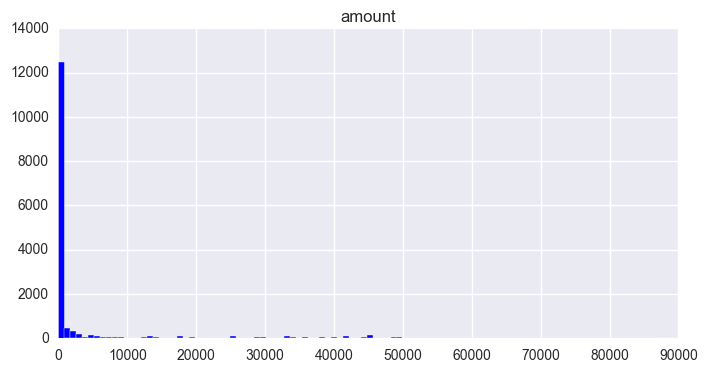

In [13]:
plt.show()

## Flow Pattern

In [17]:
# Initializing the data and variables

# fixed variables
threshold = 4
deviation = 0.15
max_iter = 10**4

# Initializing list of clients
data_clients = df_clients.as_matrix()
list_id_clients = data_clients[:,0].reshape(data_clients.shape[0],1)

# Initializing list of transactions, with source and target and amount_transac / matrix (nb_transactions,4)
data_transac = df_transac.as_matrix()
matrix_transac = np.concatenate((data_transac[:,0:3], data_transac[:,5].reshape(data_transac.shape[0],1)), axis=1)

#nb of clients
l = len(list_id_clients)

In [18]:
def corresponding_func(id_source,matrix_transac):
    l = matrix_transac.shape[0]
    i = 0
    for i in range(0,l):
        if(id_source==matrix_transac[i,1]):
            id_transac = matrix_transac[i,0]
            id_target = matrix_transac[i,2]
            amount_transac = matrix_transac[i,3]
            break
        else:
            id_transac = 0
            id_target = 0
            amount_transac = 0
    return id_transac,id_target,amount_transac

In [19]:
list_back_tot = list()
k = 0
while(True):
    k += 1
    list_back = list()
    i = np.random.randint(0,list_id_clients.shape[0])
    id_source = list_id_clients[i,0]
    id_transac,id_target,amount_transac = corresponding_func(id_source,matrix_transac)
    list_back.append([id_transac,id_source,id_target,amount_transac])
    amount_aux = amount_transac
    l = 0
    while(amount_aux >= (1-deviation)*amount_transac and amount_aux <= amount_transac):
        amount_transac = amount_aux
        id_source = id_target
        id_transac,id_target,amount_aux = corresponding_func(id_source,matrix_transac)
        if (id_transac ==0):
            break
        list_back.append([id_transac,id_source,id_target,amount_transac])
        if (len(list_back)>=threshold ):
            list_back_tot.append(list_back)
            break
    if (k > max_iter):
        break

## Create a directed graph using a dictionnary


In [20]:
# Static lists of the sources and their targets
sources = list(df_transac['source'])
targets = list(df_transac['target'])

In [21]:
small_graph = {}
for i in range(int(len(sources))):
    small_graph[sources[i]] = targets[i]

In [22]:
edges=list()
for i in range(len(sources)):
    edges.append((sources[i],targets[i]))

In [23]:
import networkx as nx
G=nx.Graph()

In [24]:
nodes = list(set(sources[0:len(sources)]+targets[0:len(sources)]))

In [25]:
G.add_nodes_from(nodes)

In [26]:
G.add_edges_from(edges)

In [27]:
G = nx.DiGraph(G)

In [71]:
#taking few minutes ... 
list(nx.simple_cycles(G))

KeyboardInterrupt: 

In [69]:
nx.find_cycle(G ,orientation='ignore')

[('16af4580-828a-4886-9276-b5da4cff0f73',
  'b893d086-15cb-45ed-872b-a22f3a83cc79',
  'forward'),
 ('b893d086-15cb-45ed-872b-a22f3a83cc79',
  '16af4580-828a-4886-9276-b5da4cff0f73',
  'forward')]

## Circular Pattern

In [403]:
# Initializing list of clients
data_clients = df_clients.as_matrix()
list_id_clients = data_clients[:,0].reshape(data_clients.shape[0],1)

In [420]:
k = 0
while(True):
    k += 1
    list_back = list()
    list_enr = list()
    i = np.random.randint(0,list_id_clients.shape[0])
    id_source = list_id_clients[i,0]
    print(id_source)
    list_enr.append(id_source)
    id_transac,id_target,amount_transac = corresponding_func(id_source,matrix_transac)
    list_back.append([id_transac,id_source,id_target])
    l = 0
    while(not(id_target in list_enr)):
        list_enr.append(id_target)
        id_source = id_target
        id_transac,id_target,amount_aux = corresponding_func(id_source,matrix_transac)
        if (id_transac ==0):
            break
        list_back.append([id_transac,id_source,id_target])
    if (k > max_iter or len(list_enr) >= 100):
        break

8c10c9a8-f924-429f-8190-db18b332ae61


In [28]:
liste_fraud_transac = list()
for el in list_back_tot:
    for i in range(len(el)):
        liste_fraud_transac.append(el[i][0])

In [29]:
len(liste_fraud_transac)

744

In [32]:
liste = list((set(liste_fraud_transac)))

In [33]:
data_transac.shape

(15685, 7)

In [34]:
data_transac = df_transac.as_matrix()

In [35]:
fraud_column = np.zeros((data_transac.shape[0],1))

In [36]:
for i in range(data_transac.shape[0]):
    fraud_column[i] = (data_transac[i,0] in liste)

In [37]:
data_transac_labeled = np.concatenate((data_transac,fraud_column),axis=1)

In [38]:
df_transac.columns

Index(['id', 'source', 'target', 'date', 'time', 'amount', 'currency'], dtype='object')

In [39]:
df = pd.DataFrame(data = data_transac_labeled,
                  columns=['id', 'source', 'target', 'date', 'time', 'amount', 'currency','Fraud'])

In [40]:
df.head(100)

,id,source,target,date,time,amount,currency,Fraud
0,7d5d4762-24fe-4cf0-8185-40eff4d299a0,ee288787-e310-4bb8-b2a1-f0f6a1ad8f06,4abed95d-5618-42e8-a5a0-06e4d69f81ca,24/09/2015,15:57:52,1683.73,None,0
1,357a8314-c6b2-4a38-b6df-3bcaa4b6ecbb,e5018dfa-d6fc-4f44-a4ae-f59cd9e3275a,e0708e37-8466-4893-bc1b-bbae9fdd9aeb,27/17/2015,23:59:57,733.477,None,0
2,9adcfd16-ac51-47e7-85e8-8dab05ddbc23,cc9ec01d-9414-413e-bf97-896271fdc446,4c3809e8-6d31-4e79-8abd-f933dcd95c08,27/13/2017,15:34:34,469.264,None,0
3,529d9a6a-8512-4ff9-b7e9-dcd1674fbfc7,e4ad5cec-82c0-4e5e-85a2-f2a2e7bfcf52,ac0c5a47-503a-4852-ac0b-b233239ede95,24/09/2015,15:57:52,1683.73,None,0
4,56ce6a32-4059-4e35-8650-60364c0199f4,ada7124c-fea2-4956-8699-759b7b6505f3,a397e9d5-259a-4931-a073-50b007ccf1df,27/03/2015,23:23:42,3737.25,None,0
5,99eb51d9-e814-4532-9311-9221f37d0e2c,e2dbc017-597e-429e-8efc-2a4c93144220,a65fa9a2-933f-48c3-b7f8-c249216da67d,27/17/2015,23:59:57,2202.3,None,0
6,cc81e13e-bc42-416c-97b6-d7ee21c01f2e,3e792e29-327a-4d95-95ef-754caaf9b75b,4bae1993-54ab-400b-ba32-2046f1ca0a6a,27/03/2015,17:53:43,622.874,None,0
7,22c4e100-74e2-4100-9a29-75f69936228a,c61620c3-e6a9-4bb0-9cdc-b25f2c5938cd,ec51746e-84d6-4408-919d-935fcdb09b97,27/20/2016,23:58:31,1749.69,None,0
8,62ccfe19-7493-4ab3-995f-147c5482c664,595f4b91-31ba-4f2d-8bf9-3cb0249dd426,2a850800-f56f-4ccb-b750-f8798f9a6745,25/20/2017,22:47:58,1889.04,None,0
9,0241a1b0-4338-46d3-adcc-2be65c6a54da,434ef91a-f8ce-4c19-af21-47f89554c0f4,eaac3b09-c913-47ef-8312-9fb4803091ce,12/02/2016,21:56:58,2953.5,None,0


In [41]:
## Apply the one hot encoding
one_hot_source = pd.get_dummies(df['source'],prefix='source')
df.drop('source',axis=1,inplace=True)
df = df.join(one_hot_source)

## 
one_hot_target = pd.get_dummies(df['target'],prefix='target')
df.drop('target',axis=1,inplace=True)
df = df.join(one_hot_target)

##
#one_hot_source_place = pd.get_dummies(df['source place'],prefix='source')
#df.drop('source place',axis=1,inplace=True)
#df = df.join(one_hot_source_place)

##
#one_hot_target_place = pd.get_dummies(df['target place'],prefix='target')
#df.drop('target place',axis=1,inplace=True)
#df = df.join(one_hot_target_place)


## 
df.drop('id',axis=1,inplace=True)
#df.drop('Source client/company',axis=1,inplace=True)
#df.drop('target thing',axis=1,inplace=True)
#df.drop('TimeStamp',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
df.drop('time',axis=1,inplace=True)

In [42]:
data_transac_labeled = df.as_matrix()

## Try to build a ML Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
data_transac_labeled.shape

(15685, 2040)

In [45]:
df.head(2)

,amount,currency,Fraud,source_00366990-3357-4db1-8952-69dbc79c9bb6,source_004c8d77-6d93-45a4-8b70-c5190b34da67,source_00798805-46b1-48a8-98f2-da1426d66c46,source_008e1649-0073-4ae4-b6d9-0ba0fe777129,source_010b4fa3-cf0b-4cf5-9f95-aab959ac4c8c,source_01484af9-57fe-441a-a51c-856b18c226f3,source_015f0d11-37be-48bd-af27-f21f8cfe5fe7,...,target_fe6d87b4-a0a3-4057-87bf-6c98c16ef2de,target_fe810817-79aa-410d-9e28-54785dfe4168,target_febd9e96-5607-40f4-83f9-d08eb65bf6a3,target_fec91c68-5577-4979-b522-6804a0efd371,target_fedf0843-10f3-459f-9f82-80cfb490b1d8,target_ff441a2d-e593-4c24-b3b1-e4d92a8d70b3,target_ff826be0-c26b-47a0-a37e-f4a14c699545,target_ffa01b08-52d1-4d94-b6d7-177227c3ee05,target_ffc343f8-0938-43c4-aa9e-98cd052f9355,target_ffe2a820-9f26-48db-a14f-caf2db49598b
0,1683.73,None,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,733.477,None,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X = np.concatenate((data_transac_labeled[:,0:1],data_transac_labeled[:,3:data_transac_labeled.shape[1]]),axis=1)
Y = data_transac_labeled[:,2]

In [47]:
X[0:2,0:10]

array([[1683.7302711540963, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [733.4769135988205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [48]:
X = scale(X)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [49]:
Y = np.float32(Y)

In [51]:
(X_train,X_test,y_train,y_test)=train_test_split(X,Y,test_size=0.33, random_state=42)

In [63]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)

In [64]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [65]:
from sklearn.metrics import log_loss,accuracy_score

In [66]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.998261541433


In [67]:
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)